<a href="https://colab.research.google.com/github/VARSHAMG23/ML-Algorithms/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
# import libraries for data processing, visualization, and linear regression modeling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [3]:
# load data
df=pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [6]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
df.duplicated().sum()

np.int64(1784)

In [10]:
df.drop_duplicates(inplace=True)

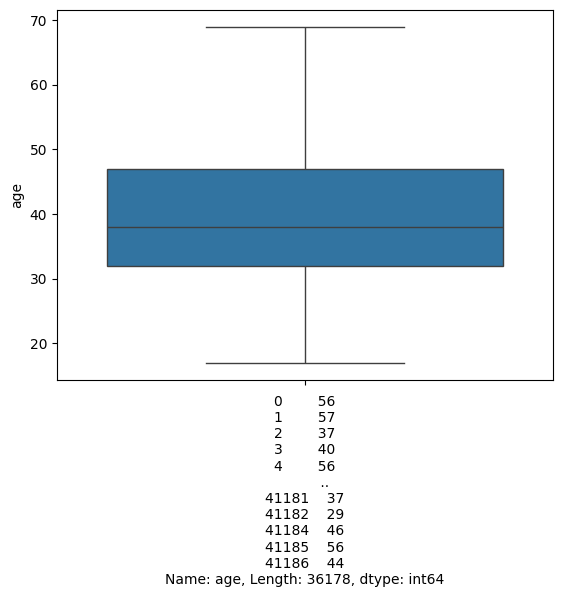

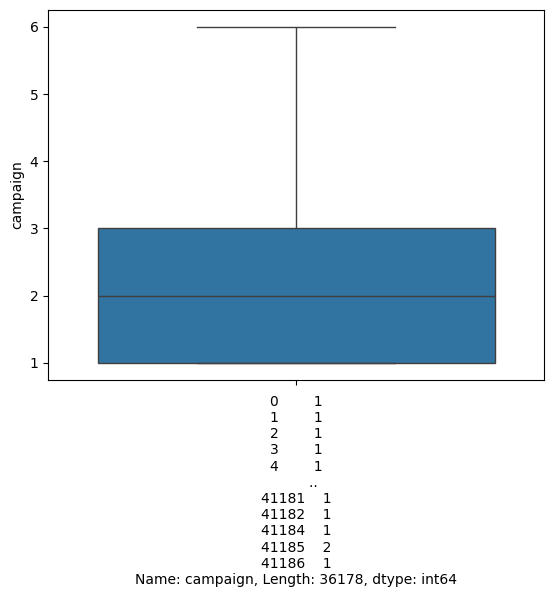

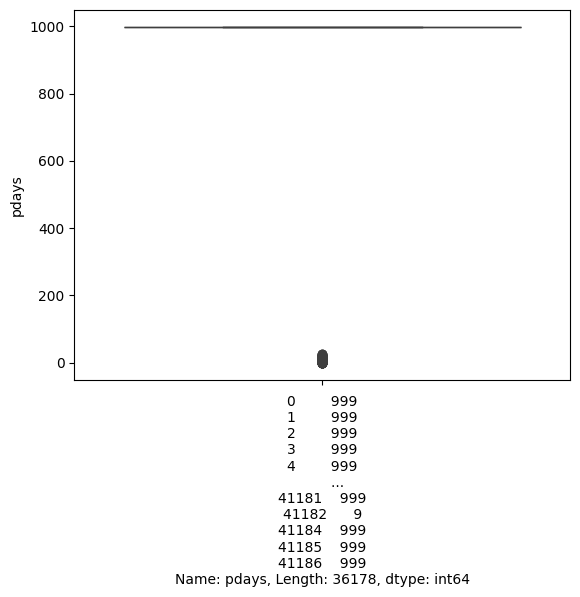

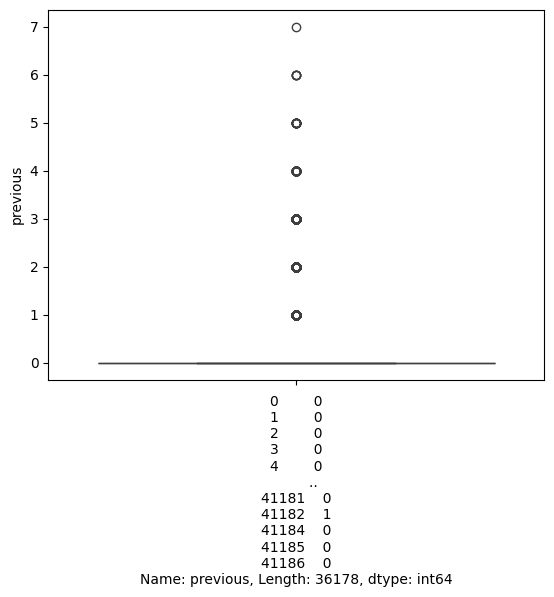

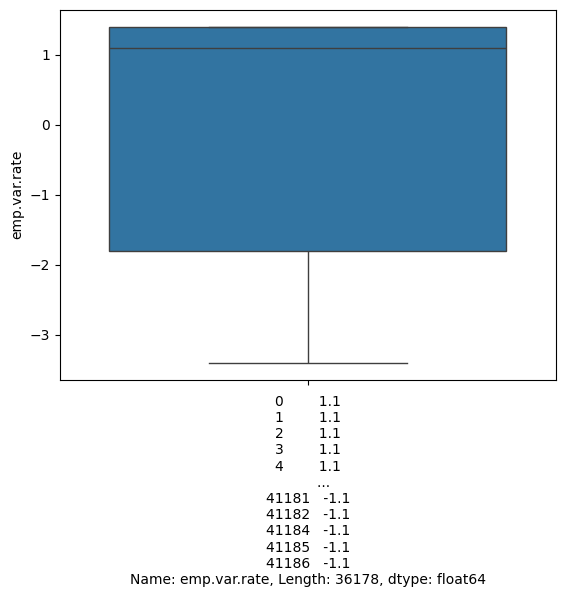

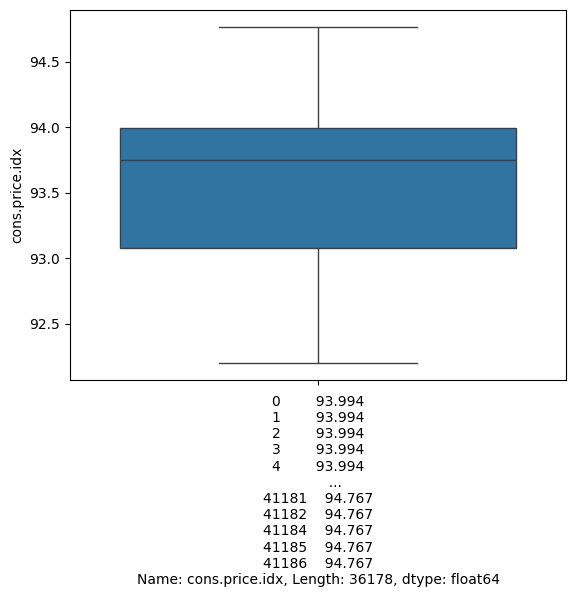

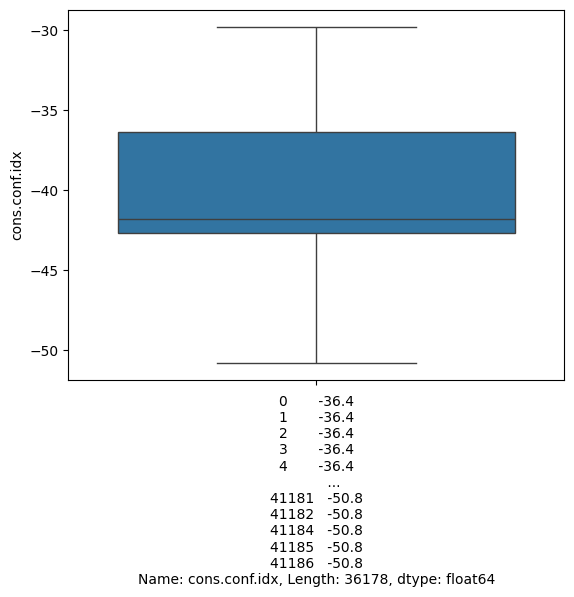

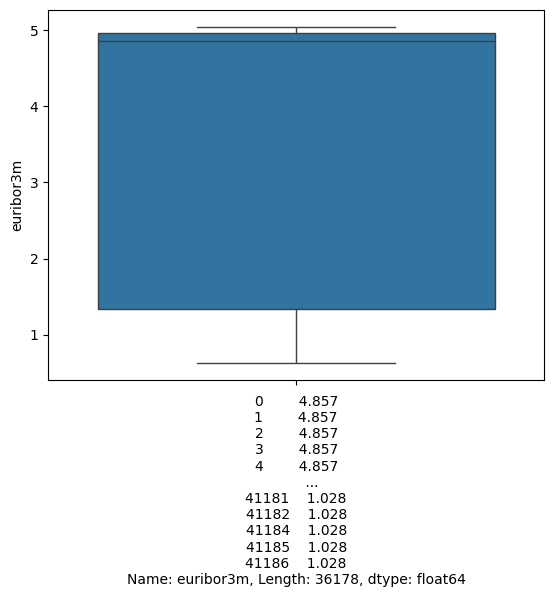

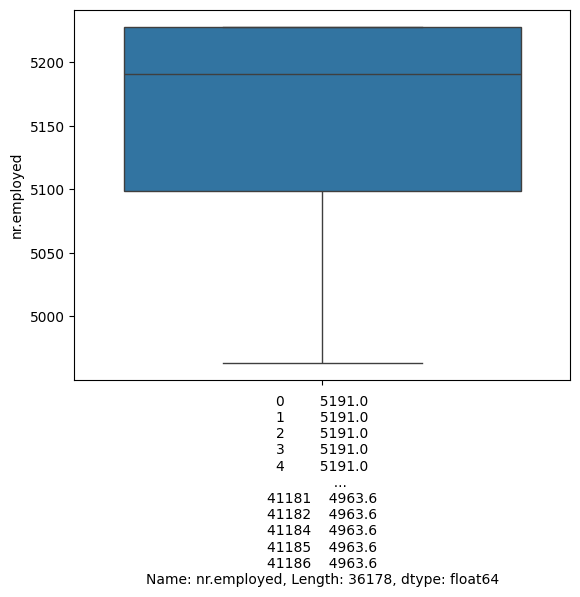

In [11]:
for col in df.columns:
  if df[col].dtype!='object':
    sns.boxplot(df[col])
    plt.xlabel(df[col])
    plt.show()

In [12]:
list=['age','campaign','cons.conf.idx']
for col in list:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  df=df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]

In [13]:
df.shape

(36178, 20)

In [14]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LE.fit_transform(df[col])


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36178 entries, 0 to 41186
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             36178 non-null  int64  
 1   job             36178 non-null  int64  
 2   marital         36178 non-null  int64  
 3   education       36178 non-null  int64  
 4   default         36178 non-null  int64  
 5   housing         36178 non-null  int64  
 6   loan            36178 non-null  int64  
 7   contact         36178 non-null  int64  
 8   month           36178 non-null  int64  
 9   day_of_week     36178 non-null  int64  
 10  campaign        36178 non-null  int64  
 11  pdays           36178 non-null  int64  
 12  previous        36178 non-null  int64  
 13  poutcome        36178 non-null  int64  
 14  emp.var.rate    36178 non-null  float64
 15  cons.price.idx  36178 non-null  float64
 16  cons.conf.idx   36178 non-null  float64
 17  euribor3m       36178 non-null  floa

In [16]:
X=df.drop('y',axis=1)   #independent columns
y=df['y']               #dependent columns

In [19]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [18]:
#Check Multicollinearity
#Variation inflation factor
# VIF > 5 should be eliminatedd
# Feature Selection and elimination

In [20]:
vif_df=pd.DataFrame()
vif_df

""


In [22]:
vif_df['Features']=X.columns

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_values=[]
for i in range(len(X.columns)):
  vif=variance_inflation_factor(X.values,i)
  vif_values.append(vif)
vif_df['Multicollinearity']=vif_values

In [24]:
vif_df

,Features,Multicollinearity
0,age,21.966070
1,job,2.114551
2,marital,5.649477
3,education,4.533743
4,default,1.413486
5,housing,2.200634
6,loan,1.217609
7,contact,2.935270
8,month,6.604837
9,day_of_week,3.084861


In [29]:
X.drop('nr.employed',axis=1,inplace=True)

KeyError: "['nr.employed'] not found in axis"

In [30]:
vif_df

,Features,Multicollinearity
0,age,21.966070
1,job,2.114551
2,marital,5.649477
3,education,4.533743
4,default,1.413486
5,housing,2.200634
6,loan,1.217609
7,contact,2.935270
8,month,6.604837
9,day_of_week,3.084861


In [33]:
vif_df=pd.DataFrame()
vif_df['Features']=X.columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_values=[]
for i in range(len(X.columns)):
  vif=variance_inflation_factor(X.values,i)
  vif_values.append(vif)
vif_df['Multicollinearity']=vif_values

In [34]:
vif_df

,Features,Multicollinearity
0,age,21.958629
1,job,2.114409
2,marital,5.648510
3,education,4.531664
4,default,1.410297
5,housing,2.200178
6,loan,1.217517
7,contact,2.468746
8,month,5.711382
9,day_of_week,3.084226


In [35]:
X.drop('euribor3m',axis=1,inplace=True)

In [37]:
vif_df=pd.DataFrame()
vif_df['Features']=X.columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_values=[]
for i in range(len(X.columns)):
  vif=variance_inflation_factor(X.values,i)
  vif_values.append(vif)
vif_df['Multicollinearity']=vif_values
vif_df

,Features,Multicollinearity
0,age,21.926364
1,job,2.114325
2,marital,5.644799
3,education,4.529986
4,default,1.409983
5,housing,2.199896
6,loan,1.217509
7,contact,2.422236
8,month,5.301590
9,day_of_week,3.083883


In [38]:
X.drop('cons.conf.idx',axis=1,inplace=True)

In [39]:
vif_df=pd.DataFrame()
vif_df['Features']=X.columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_values=[]
for i in range(len(X.columns)):
  vif=variance_inflation_factor(X.values,i)
  vif_values.append(vif)
vif_df['Multicollinearity']=vif_values
vif_df

,Features,Multicollinearity
0,age,21.679110
1,job,2.111722
2,marital,5.641153
3,education,4.466134
4,default,1.409482
5,housing,2.199833
6,loan,1.217466
7,contact,2.274155
8,month,5.279932
9,day_of_week,3.077023


In [40]:
X.drop('cons.price.idx',axis=1,inplace=True)

In [41]:
vif_df=pd.DataFrame()
vif_df['Features']=X.columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_values=[]
for i in range(len(X.columns)):
  vif=variance_inflation_factor(X.values,i)
  vif_values.append(vif)
vif_df['Multicollinearity']=vif_values
vif_df

,Features,Multicollinearity
0,age,19.909400
1,job,2.107315
2,marital,5.436852
3,education,4.424467
4,default,1.409463
5,housing,2.195213
6,loan,1.216554
7,contact,2.271768
8,month,5.207420
9,day_of_week,3.055318


In [42]:
vif_df=pd.DataFrame()
vif_df['Features']=X.columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_values=[]
for i in range(len(X.columns)):
  vif=variance_inflation_factor(X.values,i)
  vif_values.append(vif)
vif_df['Multicollinearity']=vif_values
vif_df

,Features,Multicollinearity
0,age,19.909400
1,job,2.107315
2,marital,5.436852
3,education,4.424467
4,default,1.409463
5,housing,2.195213
6,loan,1.216554
7,contact,2.271768
8,month,5.207420
9,day_of_week,3.055318


In [43]:
X.drop('poutcome',axis=1,inplace=True)

In [44]:
vif_df=pd.DataFrame()
vif_df['Features']=X.columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_values=[]
for i in range(len(X.columns)):
  vif=variance_inflation_factor(X.values,i)
  vif_values.append(vif)
vif_df['Multicollinearity']=vif_values
vif_df

,Features,Multicollinearity
0,age,14.581268
1,job,2.094942
2,marital,4.739595
3,education,4.239040
4,default,1.409256
5,housing,2.173638
6,loan,1.214726
7,contact,2.257383
8,month,5.098746
9,day_of_week,2.979841


In [45]:
X.drop('pdays',axis=1,inplace=True)

In [46]:
vif_df=pd.DataFrame()
vif_df['Features']=X.columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_values=[]
for i in range(len(X.columns)):
  vif=variance_inflation_factor(X.values,i)
  vif_values.append(vif)
vif_df['Multicollinearity']=vif_values
vif_df

,Features,Multicollinearity
0,age,8.714872
1,job,2.084870
2,marital,4.049421
3,education,4.100003
4,default,1.408563
5,housing,2.145898
6,loan,1.212179
7,contact,2.257045
8,month,4.832671
9,day_of_week,2.914041


In [47]:
X.drop('age',axis=1,inplace=True)

In [48]:
vif_df=pd.DataFrame()
vif_df['Features']=X.columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_values=[]
for i in range(len(X.columns)):
  vif=variance_inflation_factor(X.values,i)
  vif_values.append(vif)
vif_df['Multicollinearity']=vif_values
vif_df

,Features,Multicollinearity
0,job,2.042861
1,marital,4.034238
2,education,3.721585
3,default,1.310552
4,housing,2.059338
5,loan,1.206251
6,contact,2.248569
7,month,4.390682
8,day_of_week,2.732719
9,campaign,3.071028


In [50]:
Log_reg=LogisticRegression()

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=100)

In [52]:
Log_reg.fit(X_train,y_train)

LogisticRegression()

In [53]:
y_pred=Log_reg.predict(X_test)

In [56]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

,Actual,Predicted
9152,0,0
40817,0,0
24005,1,0
25897,0,0
12059,0,0
...,...,...
35434,0,0
33398,1,0
2229,0,0
27824,1,0


In [59]:
accuracy_score(y_pred,y_test)*100

88.6677722498618